In [1]:
#-*- coding: utf-8 -*-
import pickle
import os
import gc 
import numpy as np
import matplotlib.pyplot as plt
 
def containlogfile(folder):
    ''' Does the folder contain log file?
    Args:
        folder: str
    '''
    
    for e in os.listdir(folder):
        if '.pkl' in e:
            return True        
    return False

data_path = '../TinyOS-Benchmark/preprocessed-dataset/'
paths_data = {}
paths = list(os.walk(data_path))
for i in range(len(paths)):
    #if i > 8: break
    print('{:2}/{:2}: {}'.format(i, len(paths)-1, paths[i][0]))
    if containlogfile(paths[i][0]) and paths[i][0] not in paths_data:
        paths_data[paths[i][0]] = []
    for e2 in paths[i][2]:
        fn = os.path.join(paths[i][0], e2)
        with open(fn, 'rb') as f:
            paths_data[paths[i][0]] += pickle.load(f)

 0/49: ../TinyOS-Benchmark/preprocessed-dataset/
 1/49: ../TinyOS-Benchmark/preprocessed-dataset/RadioSenseToLeds
 2/49: ../TinyOS-Benchmark/preprocessed-dataset/TCPEcho
 3/49: ../TinyOS-Benchmark/preprocessed-dataset/MultihopOscilloscope
 4/49: ../TinyOS-Benchmark/preprocessed-dataset/tests
 5/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLpl
 6/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/RadioStress
 7/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed
 8/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLedSingle
 9/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/BlinkLed
10/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLed
11/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/LedColor
12/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420
13/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestAcks
14/49: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplBroadcastCountToLeds
15/49: ../T

In [2]:
import pandas as pd


def split_with_slice(logcalls, slice = 10):
    """ 按份数分割数据

    Args:
		logcalls: list 
		来源于Cooja仿真的logcalls记录, 其格式是列表或者元祖，每一个索引都包含一条函数调用或者返回信息。比如:

			[
				1508761084952  Call to $ac4e: __nesc_atomic_start (memset.c),
				1508761084952    Call to $9dc6: __nesc_disable_interrupt (local in app.c),
			 	1508761084952    return from __nesc_disable_interrupt (local in app.c) elapsed: 15 maxStackUsage: 0,
      			1508761084952  return from __nesc_atomic_start (memset.c) elapsed: 46 maxStackUsage: 0
            ]
                  		
        slice: int
        	份数， 将logcalls尽量分割成包含相同数量日志的slice份
        	
    Returns:
    	logcalls_splited: list
    		分割后的logcalls，其中logcalls_splited的每个元素都是logcalls的一个切片子集， 每个切片大小几乎相等或者完全相等
    """
    each_len = len(logcalls)/float(slice) # 每份数据的日志数量
    # 每个子份的切片范围
    each_range = [(int(round(each_len*i, 0)), int(round(each_len*(i+1), 0))) for i in range(slice)]
    return list(map(lambda e: logcalls[e[0]: e[1]], each_range)) # 返回切片后的数据

def most_tasks(ls, num=5):
    ''' shoot tasks make up the majority in the logs
    Args:
        ls: list, logs look [(timestamp, taskid) ...]
        num: int, the top of task
    Retval:
        ([(taskid, number, precent) ... num], allprecent, num)
        allprecent is the sum of each prcent in the first item precents  
        num is the number of tasks, len(ls) yet.
    '''
    count = {}
    for e in ls:
        if e[1] in count:
            count[e[1]] += 1
        else:
            count[e[1]] = 1

    count = list(map(lambda k: (k, count[k]), count.keys()))
    count = sorted(count, key=lambda e: e[1], reverse=True)
    #count = list(map(lambda e: (e[0], e[1],  # using round to calculate the precent of tasks
    #                 round(float(e[1]) / len(ls), 2)), count))
    # no round() function
    count = list(map(lambda e: (e[0], e[1], 
                    float(e[1]) / len(ls)), count))    
    return count[:num], sum(map(lambda e: e[2], count[:num])), len(ls)

PARTS = 10 # 将日志均等分为10份
parted_data = {} #均分后存入这里
for k, v in paths_data.items():
    print(k)
    parted_data[k] = split_with_slice(v, PARTS)
    
most_data = {} # 每个应用最多的10个任务
cnt = 0
for k, v in paths_data.items():
    print('{} / {}'.format(cnt, len(paths_data.items())))
    cnt += 1
    most_data[k] = list(map(lambda e: e[0], most_tasks(v, 10)[0]))

../TinyOS-Benchmark/preprocessed-dataset/RadioSenseToLeds
../TinyOS-Benchmark/preprocessed-dataset/TCPEcho
../TinyOS-Benchmark/preprocessed-dataset/MultihopOscilloscope
../TinyOS-Benchmark/preprocessed-dataset/tests/TestLpl
../TinyOS-Benchmark/preprocessed-dataset/tests/RadioStress
../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLedSingle
../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/BlinkLed
../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLed
../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/LedColor
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestAcks
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplBroadcastCountToLeds
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplUnicastPeriodicDelivery
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/RssiToSerial
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestPacketLink
../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TxThroughput
../TinyOS-Benchmark/preprocess

In [3]:

    
each_mat_data = {} # 每个应用对应的最多的10个（也可能少于10个）任务组成的转移矩阵，每个value为一个dict形式如下
'''
         task1,    task2,    ...    taskn
task1     e1        e2               en
task2     .          .       ...      .
 .
 .
taskn     .         .        ...      .

每个e1为一个np.array，长度为10, 其内容为日志按照分割为均等的10份，该转移在对应窗口内的数量

'''
for k, v in most_data.items():
    each_mat_data[k] = {e: {e1: [0 for i in range(PARTS)] for e1 in v } for e in v}
    
# for k, v in each_mat_data.items():
#     print('\n\n\n', k,'\n--------------\n', v)

cnt = 0
for k, v in most_data.items():
    temp_idx = 0 # 一直计数到PARTS
    for each_part in parted_data[k]: # 遍历每一组数据
        for idx in range(len(each_part)-1):
            if each_part[idx][1] in v and each_part[idx+1][1] in v:
                each_mat_data[k][each_part[idx][1]][each_part[idx+1][1]][temp_idx] += 1           
        temp_idx += 1

for k, v in each_mat_data.items():
    print(k, v)

../TinyOS-Benchmark/preprocessed-dataset/RadioSenseToLeds {'0x0004': {'0x0004': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x0003': [5774, 5773, 5567, 5361, 5361, 6084, 6254, 6016, 5773, 5774], '0x0010': [5774, 5774, 5568, 5361, 5362, 6082, 6255, 6013, 5774, 5773], '0x0001': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x0000': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x0002': [5773, 5774, 5567, 5362, 5361, 6083, 6255, 6014, 5774, 5774], '0x000a': [5773, 5774, 5567, 5361, 5361, 6082, 6255, 6014, 5774, 5774], '0x000f': [0, 0, 0, 0, 0, 1, 0, 1, 0, 0], '0x000d': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x0008': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, '0x0003': {'0x0004': [5773, 5774, 5567, 5361, 5362, 6082, 6255, 6014, 5774, 5774], '0x0003': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x0010': [546, 540, 280, 0, 0, 0, 0, 0, 0, 0], '0x0001': [5228, 5233, 5288, 5361, 5361, 6084, 6255, 6014, 5773, 5773], '0x0000': [5773, 5773, 5567, 5362, 5361, 6083, 6255, 6015, 5773, 5774], '0x0002': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '0x000a': [0, 0, 0, 0, 0, 0, 0



----  ../TinyOS-Benchmark/preprocessed-dataset/RadioSenseToLeds -----




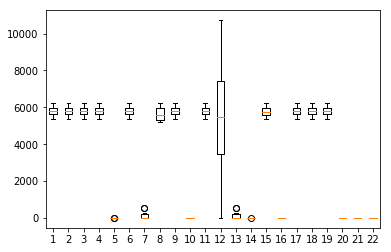



----  ../TinyOS-Benchmark/preprocessed-dataset/TCPEcho -----




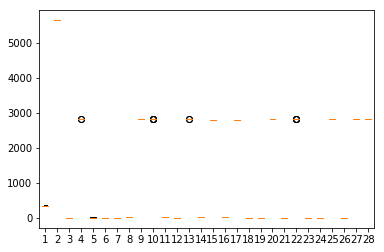



----  ../TinyOS-Benchmark/preprocessed-dataset/MultihopOscilloscope -----




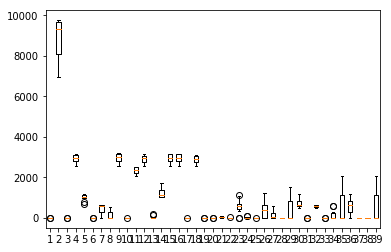



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLpl -----




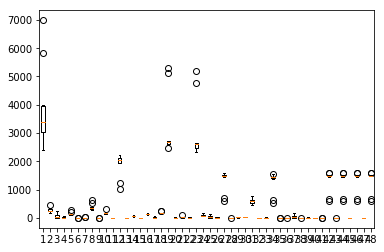



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/RadioStress -----




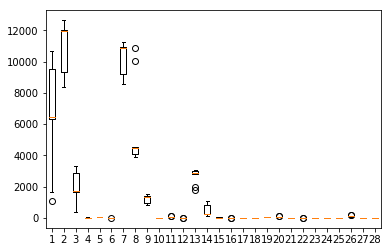



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLedSingle -----




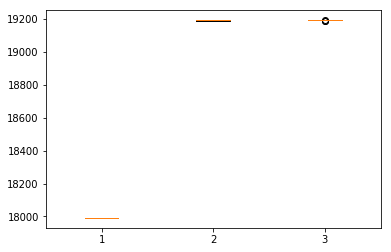



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/BlinkLed -----




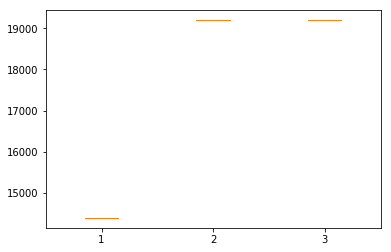



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLed -----




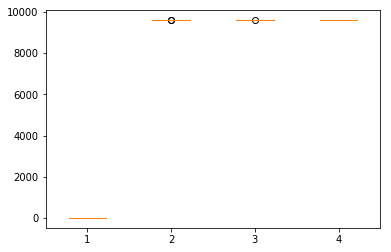



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/LedColor -----




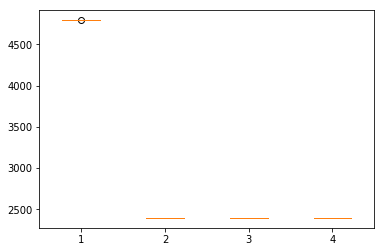



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestAcks -----




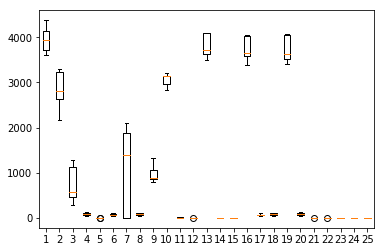



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplBroadcastCountToLeds -----




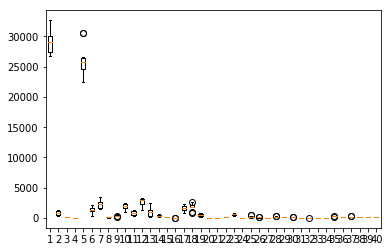



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplUnicastPeriodicDelivery -----




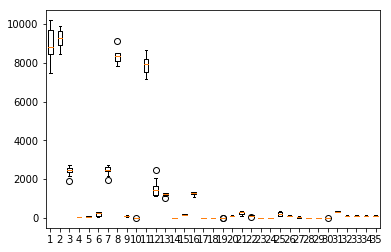



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/RssiToSerial -----




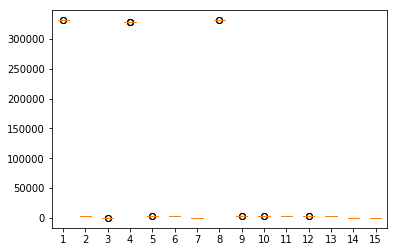



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestPacketLink -----




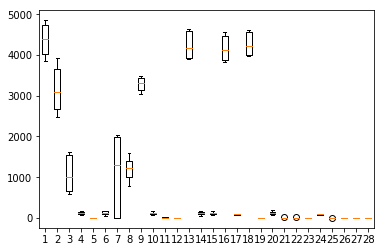



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TxThroughput -----




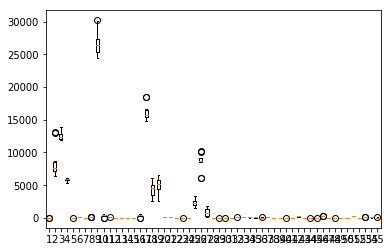



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplBroadcastPeriodicDelivery -----




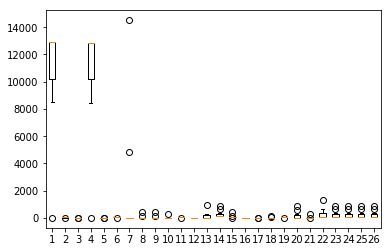



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestSecurity/RadioCountToLeds1 -----




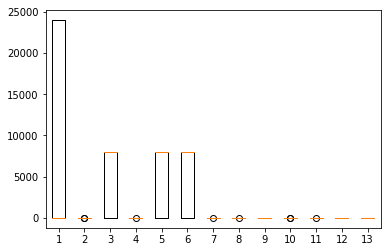



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestSerialBandwidth -----




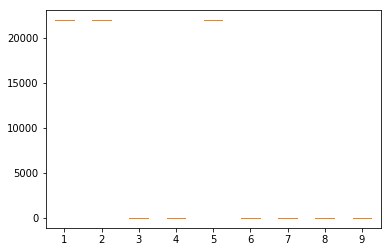



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/telosb/TestUserButton -----




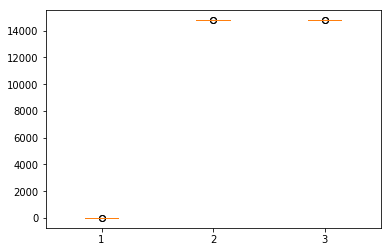



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestPowerManager -----




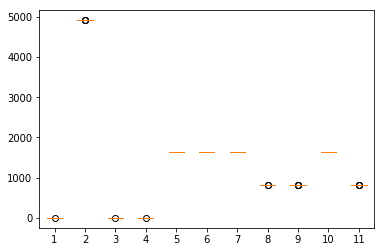



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestEui -----




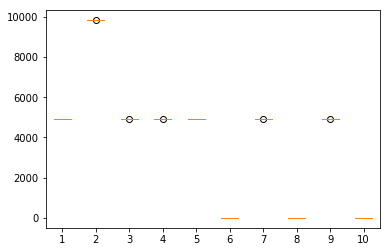



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/NxFloat -----




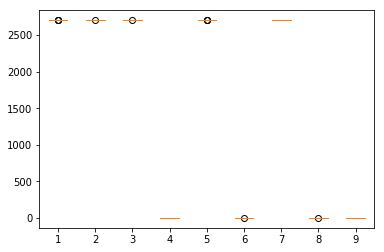



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestNetwork -----




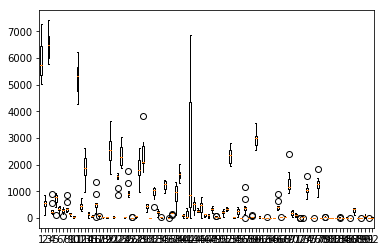



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestFtsp/Ftsp -----




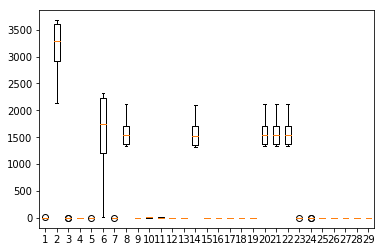



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestFtsp/FtspLplBeaconer -----




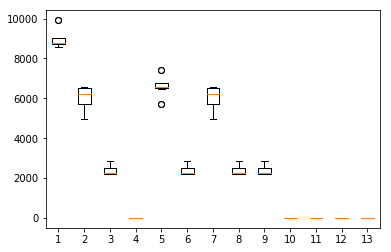



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestFtsp/FtspLpl -----




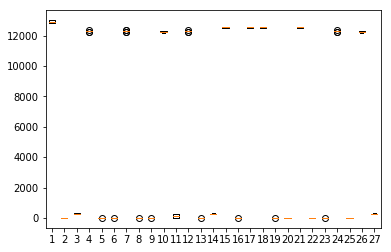



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestAM -----




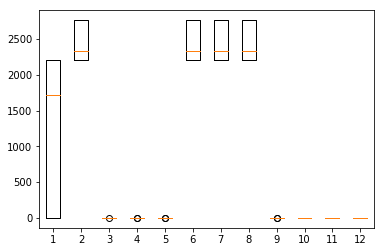



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestPrintf -----




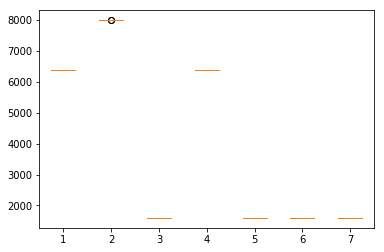



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestSerial -----




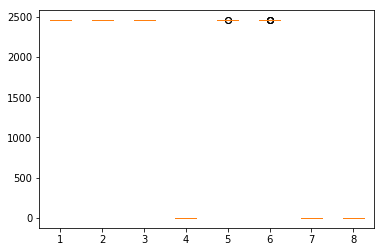



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestAMOnOff -----




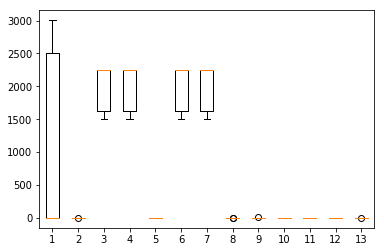



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestNetworkLpl -----




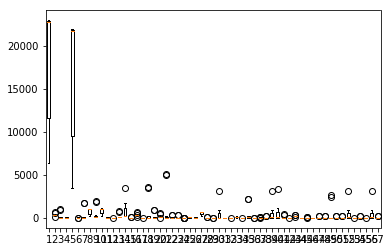



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/storage/Log -----




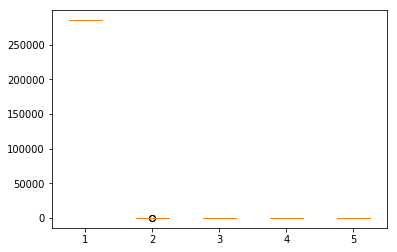



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/storage/Config -----




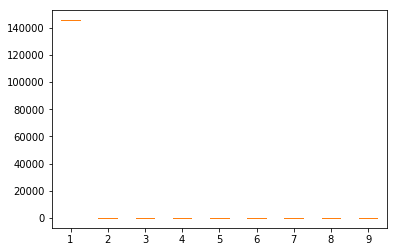



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/storage/SyncLog -----




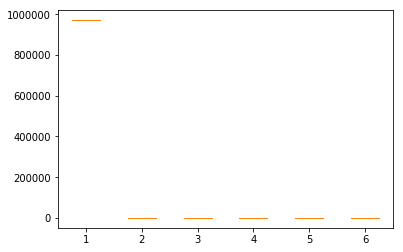



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/storage/CircularLog -----




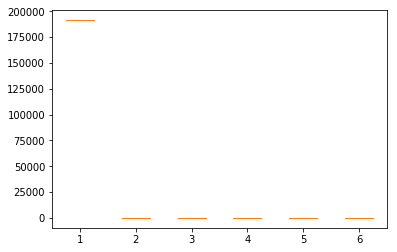



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/storage/Block -----




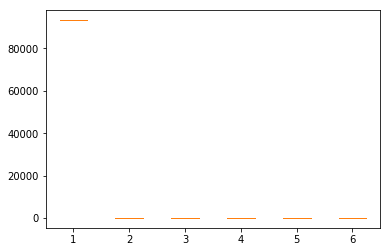



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/arbiters/TestRoundRobinArbiter -----




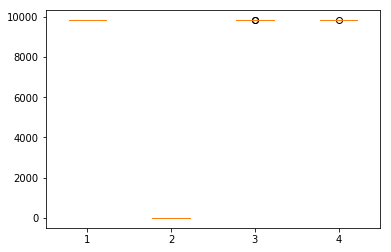



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/arbiters/TestFcfsArbiter -----




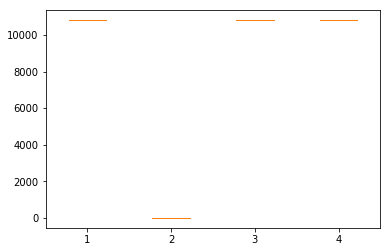



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestDissemination -----




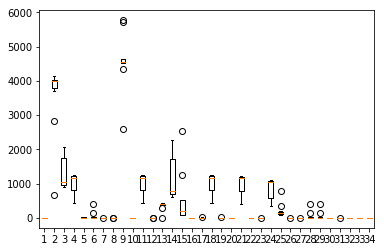



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLocalTime -----




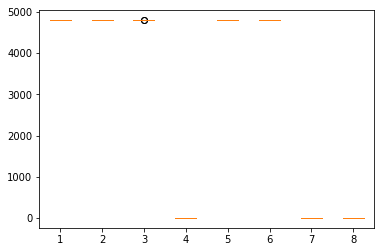



----  ../TinyOS-Benchmark/preprocessed-dataset/tests/TestTymo -----




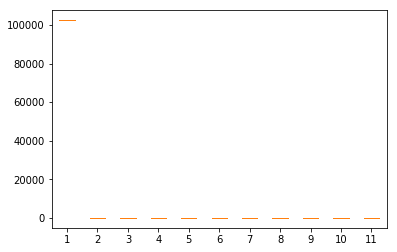

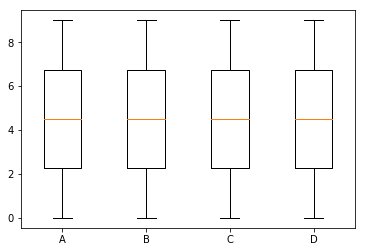

In [9]:

# for k, v in each_mat_data.items():
#     print(k, v)
import numpy as np
import matplotlib.pyplot as plt

for k, v in each_mat_data.items():
    plt.figure(0)
    temp_data = []
    temp_labels = []
    print('\n\n---- ', k, '-----\n\n')
    for k1, v1 in v.items():
        for k2, v2 in v1.items():
            if sum(v2) != 0:
                temp_data.append(v2)
                #temp_labels.append(str(k1)+'->'+str(k2)) #太密了，看不清楚了
                temp_labels = list((range(1, len(temp_data)+1)))
    plt.boxplot(temp_data, labels = temp_labels)  
    #plt.legend(temp_labels)
    plt.show()
    plt.close(0)
    
np.random.seed(100)
data = [list(range(10)) for i in range(4)]
labels = ['A', 'B', 'C' , 'D']
plt.boxplot(data, labels = labels)
plt.show()

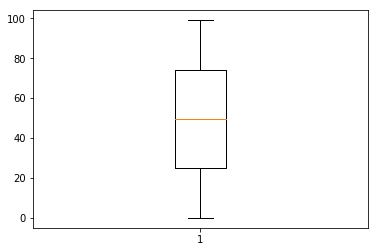

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
np.random.seed(100)
 
# 生成一组随机数，数量为1000
data = list((range(100)))
 
# sym 调整好异常值的点的形状
# whis 默认是1.5， 通过调整它的竖直来设置异常值显示的数量，
# 如果想显示尽可能多的异常值，whis设置很小，否则很大
plt.boxplot(data, sym ="o", whis = 1.5)
# plt.boxplot(data, sym ="o", whis = 0.01)
# plt.boxplot(data, sym ="o", whis = 999)
plt.show()

In [6]:
import pandas as pd
d = pd.DataFrame([], index=('FF', 'PP'), columns=list("ABC"))
print(d)
print(d['B']['PP'])
d['B']['PP'] = 12
d.loc[:,:] = np.array([1, 2])
print(d)
print(d['B']['PP'])



      A    B    C
FF  NaN  NaN  NaN
PP  NaN  NaN  NaN
nan


ValueError: could not broadcast input array from shape (2) into shape (2,3)

In [ ]:
#-*- coding: utf-8 -*-
import pickle
import os
import gc

def containlogfile(folder):
    ''' Does the folder contain log file?
    Args:
        folder: str
    '''
    
    for e in os.listdir(folder):
        if '.pkl' in e:
            return True        
    return False

data_path = '../TinyOS-Benchmark/preprocessed-dataset/'
paths_data = {}
paths = list(os.walk(data_path))
for i in range(len(paths)):
    #if i > 8: break
    print('{:2}/{:2}: {}'.format(i, len(paths)-1, paths[i][0]))
    if containlogfile(paths[i][0]) and paths[i][0] not in paths_data:
        paths_data[paths[i][0]] = []
    for e2 in paths[i][2]:
        fn = os.path.join(paths[i][0], e2)
        with open(fn, 'rb') as f:
            paths_data[paths[i][0]] += pickle.load(f)
            

    
## covert data format of fre to tran
temp_paths_data = {k: [] for k in paths_data.keys()}
idx = 0
for k in paths_data.keys():
    idx += 1
    print('Coverting {:2}: {}'.format(idx, k))
    for i in range(len(paths_data[k])-1):
        temp_paths_data[k].append((paths_data[k][i][0], paths_data[k][i][1]+'-'+paths_data[k][i+1][1]))
paths_data = temp_paths_data            

def most_tasks(ls, num=5):
    ''' shoot tasks make up the majority in the logs
    Args:
        ls: list, logs look [(timestamp, taskid) ...]
        num: int, the top of task
    Retval:
        ([(taskid, number, precent) ... num], allprecent, num)
        allprecent is the sum of each prcent in the first item precents  
        num is the number of tasks, len(ls) yet.
    '''
    count = {}
    for e in ls:
        if e[1] in count:
            count[e[1]] += 1
        else:
            count[e[1]] = 1

    count = list(map(lambda k: (k, count[k]), count.keys()))
    count = sorted(count, key=lambda e: e[1], reverse=True)
    #count = list(map(lambda e: (e[0], e[1],  # using round to calculate the precent of tasks
    #                 round(float(e[1]) / len(ls), 2)), count))
    # no round() function
    count = list(map(lambda e: (e[0], e[1], 
                    float(e[1]) / len(ls)), count))  
    
    return count[:num], sum(map(lambda e: e[2], count[:num])), len(ls)    
    

In [ ]:
###################### 2d ######################################
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
top_task_num = 8
y = []
idx = 1 #
for k, v in paths_data.items():
    retval = most_tasks(v, top_task_num)
    for e in map(lambda e: e[2], retval[0]):
        plt.plot([idx], [e], marker='o', color='r')
    idx += 1
    y.append(sum(map(lambda e: e[2], retval[0])))
plt.ylim(0, 1)
plt.plot(list(range(1, len(y) + 1)), y, marker='o', linestyle=' ')

plt.savefig('feature-by-frequency-2d.png')
plt.show()  
plt.close(0)
############ end of 2d ###########

In [ ]:

###################### 3d ######################################
colors = ['darkorange', 'forestgreen', 'cornflowerblue', 'goldenrod', 'lightseagreen', 'blueviolet', 'red',
         'y', 'teal', 'fuchsia', 'orangered', 'lawngreen', 'hotpink']

prob = [[] for i in range(top_task_num)]
for k, v in paths_data.items():
    retval = most_tasks(v, top_task_num)
    #temp = list(map(lambda e: e[2], retval[0]))
    for i in range(top_task_num):
        if i >= len(retval[0]):
            prob[i].append(0.0)
        else:
            prob[i].append(retval[0][i][2])
plus_prob = []    

# Add up all the values.
for i in range(len(prob[0])):
    plus_prob.append(sum(map(lambda e: e[i], prob)))
prob.insert(0, plus_prob)

fig = plt.figure(1)
ax = fig.gca(projection='3d')
idx = 0
for c, z in zip(['k'] + [colors[i] for i in range(top_task_num)], reversed([i * 10 for i in range(top_task_num + 1)])):
    xs = np.arange(len(prob[0]))
    ys = prob[idx]
    idx += 1
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
    
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_yticklabels(['Top {}'.format(top_task_num-i) for i in range(top_task_num)] + ['Total'])
ax.set_zticklabels(['{}%'.format(i*20) for i in range(6)])
ax.set_xlabel('{} applications'.format(len(prob[0])))
ax.set_ylabel('{} top tasks'.format(top_task_num))
ax.set_zlabel('Percent')
plt.savefig('feature-by-frequency-3d.png')
plt.show()
plt.close(1)
############ end of 3d ###########

In [ ]:
## test
import xlsxwriter,xlrd
import sys,os.path

from xlrd.timemachine import xrange

fname = 'tables.xlsx'
if not os.path.isfile(fname):
    print ('do not exist this file')
    sys.exit()
data = xlrd.open_workbook(fname)            # 打开fname文件
data.sheet_names()                          # 获取xls文件中所有sheet的名称
table = data.sheet_by_index(0)              # 通过索引获取xls文件第0个sheet
nrows = table.nrows                         # 获取table工作表总行数
ncols = table.ncols                         # 获取table工作表总列数
workbook = xlsxwriter.Workbook('zm6.xls')  #创建一个excel文件
# worksheet = workbook.add_worksheet()        #创建一个工作表对象


print(data.sheet_names())

for a, val in enumerate(data.sheet_names()):
    worksheet = workbook.add_worksheet(val)
    for i in xrange( data.sheet_by_name(val).nrows):
        for j in xrange(data.sheet_by_name(val).ncols):
            cell_value = table.cell_value(i, j, )  # 获取第i行中第j列的值
            worksheet.write(i, j, cell_value)  # 把获取到的值写入文件对应的行列
workbook.close()

In [ ]:
#coding=utf-8  
import xlwt  
import xlrd  
try:  
    # 创建excel文件  
    filename=xlwt.Workbook()  

    # 给工作表命名，test  
    sheet=filename.add_sheet("tab1")  
    # 写入内容，第4行第3列写入‘张三丰’  
    hello=u'张三丰'  
    sheet.write(3,2,hello)  
    # 指定存储路径，如果当前路径存在同名文件，会覆盖掉同名文件  
    filename.save("./tables1.xlsx")  

except Exception as e:  
    print(str(e))  